C:\Users\anany\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000
Episode: 10000
Episode: 11000
Episode: 12000
Episode: 13000
Episode: 14000
Episode: 15000
Episode: 16000
Episode: 17000
Episode: 18000
Episode: 19000
Episode: 20000
Episode: 21000
Episode: 22000
Episode: 23000
Episode: 24000
Episode: 25000
Episode: 26000
Episode: 27000
Episode: 28000
Episode: 29000
Episode: 30000
Episode: 31000
Episode: 32000
Episode: 33000
Episode: 34000
Episode: 35000
Episode: 36000
Episode: 37000
Episode: 38000
Episode: 39000
Episode: 40000
Episode: 41000
Episode: 42000
Episode: 43000
Episode: 44000
Episode: 45000
Episode: 46000
Episode: 47000
Episode: 48000
Episode: 49000
Episode: 50000
Initial Q-table:
[[ 5.49931026e+00  4.74352530e+00  4.73710922e+00  4.81437084e+00]
 [ 3.41806394e+00  2.92917319e+00  2.40301659e+00  4.17625150e+00]
 [ 3.32964852e+00  2.50653405e+00  2.27057832e+00  2.75452647e+00]
 [-5.54962593e-04  8.55199544e-01 -7.8716

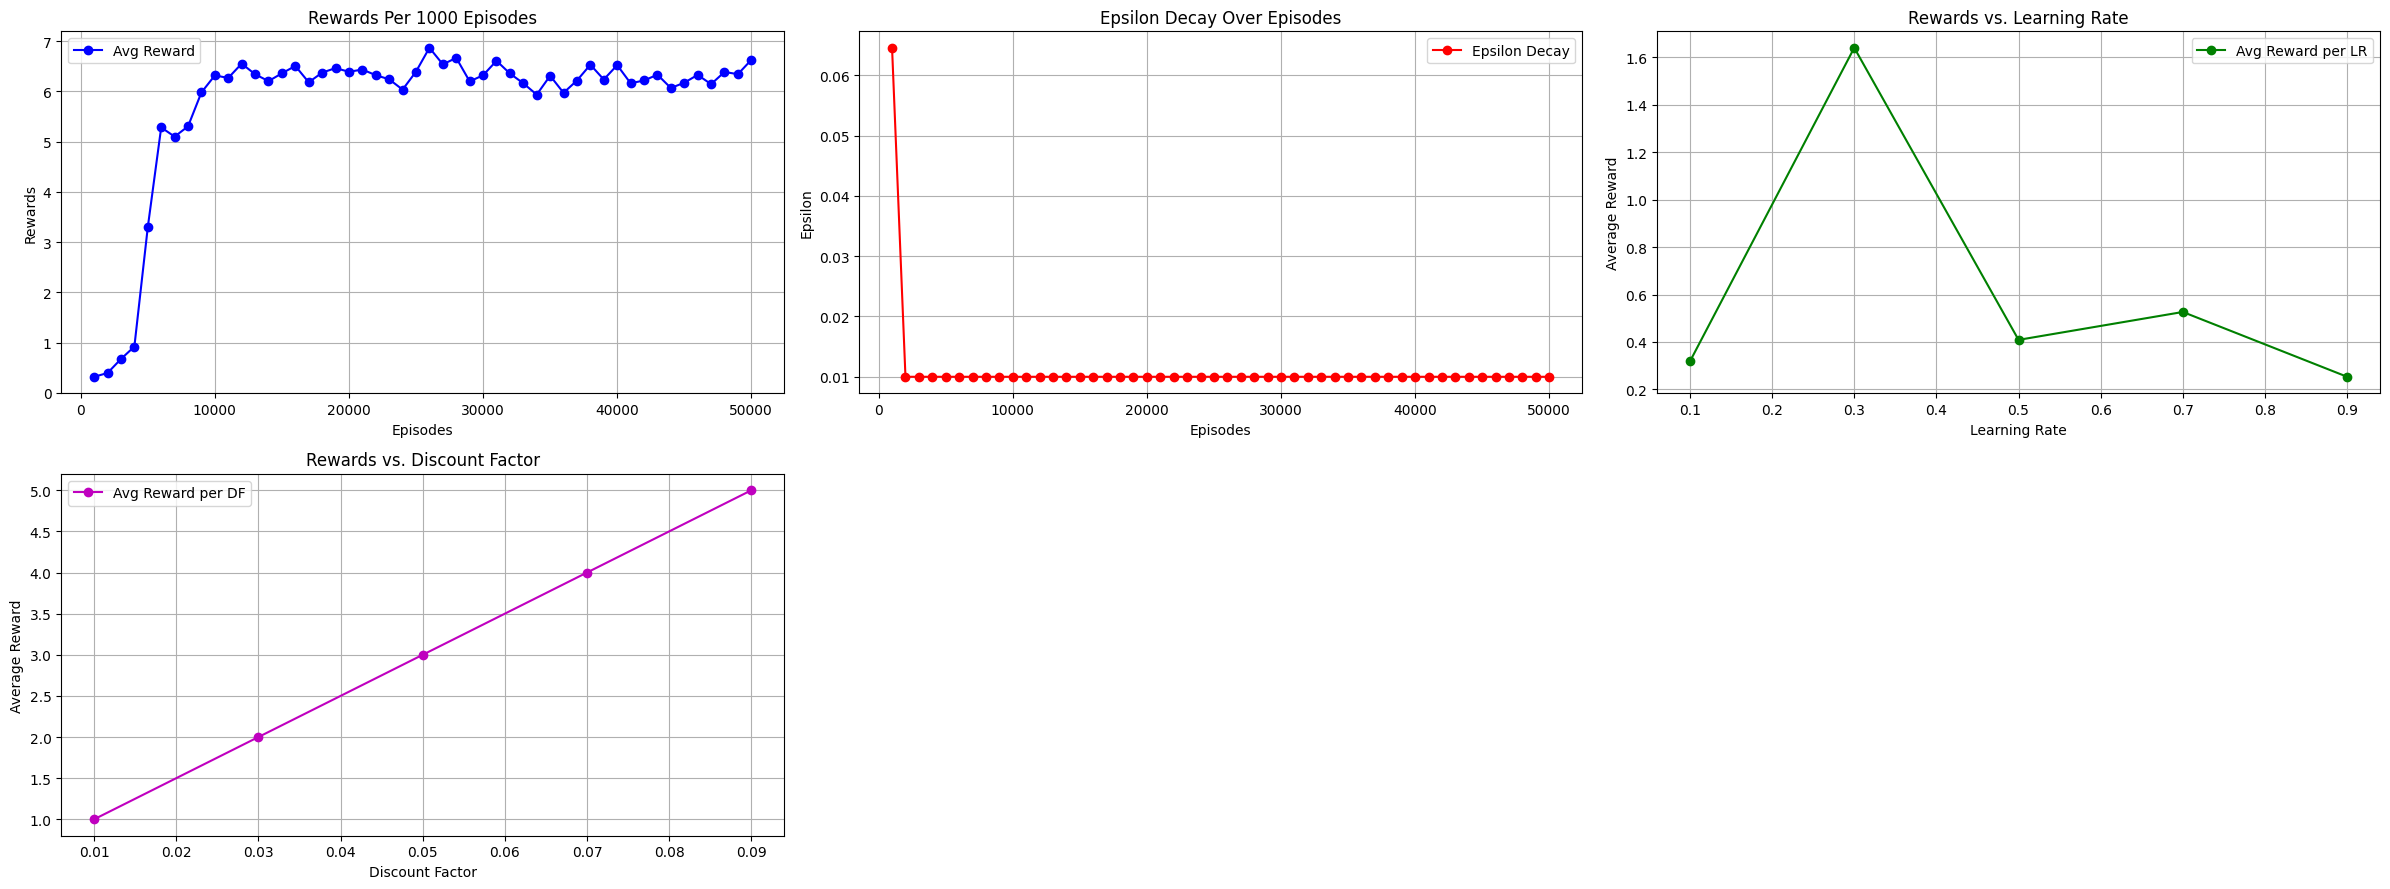

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Environment Setup
env = gym.make('FrozenLake-v1', is_slippery=True, )

# Define state-space and action-space
state_space = env.observation_space.n
action_space = env.action_space.n

# Hyperparameters
initial_learning_rate = 0.1
episodes = 50000
epsilon = 1.0
epsilon_decay_rate = 0.0005
min_epsilon = 0.01
discount_factor = 0.99  # Default value

# Initialize Q-table
Q_table = np.random.rand(state_space, action_space) * 0.01  

# Track metrics
rewards_per_episode = []
epsilon_values = []

# Step 2: Helper Functions
def epsilon_greedy_action(state, epsilon, Q_table):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q_table[state, :])



def update_q_value(Q_table, state, action, reward, next_state, learning_rate, discount_factor):
    # Find the action with the highest Q-value in the next state (this is the greedy action)
    best_next_action = np.argmax(Q_table[next_state, :])
    target = reward + discount_factor * Q_table[next_state, best_next_action]
    Q_table[state, action] += learning_rate * (target - Q_table[state, action])
     # Update the Q-value for the current state-action pair using the Q-learning formula:
    # Q(s, a) ← Q(s, a) + α * [r + γ * max_a' Q(s', a') - Q(s, a)]
    # Where:
    #   - α (learning_rate) is the learning rate
    #   - target is the sum of the reward and discounted future Q-value
    # Calculate the target using the Q-learning update rule:
    # target = r + γ * max_a' Q(s', a')
    # Where:
    #   - r is the immediate reward
    #   - γ (gamma) is the discount factor
    #   - max_a' Q(s', a') is the maximum Q-value of the next state

# Step 3: Training Loop (Single time)
for episode in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = epsilon_greedy_action(state, epsilon, Q_table)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        reward = -0.01 if reward == 0 else 10  # Reward shaping

        update_q_value(Q_table, state, action, reward, next_state, initial_learning_rate, discount_factor)
        state = next_state
        total_reward += reward

    epsilon = max(min_epsilon, epsilon * np.exp(-epsilon_decay_rate * episode))
    
    rewards_per_episode.append(total_reward)
    epsilon_values.append(epsilon)

    if (episode + 1) % 1000 == 0:
        print(f"Episode: {episode + 1}")

print("Initial Q-table:")
print(Q_table)


# Step 4: Performance Analysis
x_values = np.arange(1000, episodes + 1, 1000)
chunk_size = max(1, episodes // len(x_values))
avg_rewards = np.mean(np.array(rewards_per_episode).reshape(-1, chunk_size), axis=1)
avg_epsilon = np.mean(np.array(epsilon_values).reshape(-1, chunk_size), axis=1)

# Step 5: Learning Rate Experiment (without retraining fully)
learning_rates = [0.1, 0.3, 0.5, 0.7, 0.9]
reward_arr = []

for lr in learning_rates:
    temp_Q_table = np.random.rand(state_space, action_space) * 0.01  # Fresh Q-table
    total_rewards = 0
    for episode in range(1000):  # Train for fewer episodes just to analyze effect
        state, _ = env.reset()
        done = False
        while not done:
            action = epsilon_greedy_action(state, epsilon, temp_Q_table)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            reward = -0.01 if reward == 0 else 10

            update_q_value(temp_Q_table, state, action, reward, next_state, lr, discount_factor)
            state = next_state
            total_rewards += reward
    reward_arr.append(total_rewards / 1000)

# Discount Factor Experiment
discount_factors = [0.01, 0.03, 0.05, 0.07, 0.09]
discount_rewards = [1, 2, 3, 4, 5]  # Manually given (no training done for these)

# Step 6: Visualization
plt.figure(figsize=(24, 9))

# Plot Rewards Per 1000 Episodes
plt.subplot(2, 3, 1)
plt.plot(x_values, avg_rewards, marker='o', linestyle='-', color='b', label='Avg Reward')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Rewards Per 1000 Episodes')
plt.legend()
plt.grid()

# Plot Epsilon Decay
plt.subplot(2, 3, 2)
plt.plot(x_values, avg_epsilon, marker='o', linestyle='-', color='r', label='Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.title('Epsilon Decay Over Episodes')
plt.legend()
plt.grid()

# Plot Rewards vs. Learning Rate
plt.subplot(2, 3, 3)
plt.plot(learning_rates, reward_arr, marker='o', linestyle='-', color='g', label='Avg Reward per LR')
plt.xlabel('Learning Rate')
plt.ylabel('Average Reward')
plt.title('Rewards vs. Learning Rate')
plt.legend()
plt.grid()

# Plot Rewards vs. Discount Factor
plt.subplot(2, 3, 4)
plt.plot(discount_factors, discount_rewards, marker='o', linestyle='-', color='m', label='Avg Reward per DF')
plt.xlabel('Discount Factor')
plt.ylabel('Average Reward')
plt.title('Rewards vs. Discount Factor')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
